# ДПО МЛ0-МЛ3: упражнения

## Подготовка данных

### Задание 1.1

Постройте CountVectorizer самостоятельно для предложений ниже. Затем импортируйте CountVectorizer из sklearn и сравните результаты.

Дополнительно: используйте предобработку, например, лемматизацию, перед построением векторов.

In [ ]:
# @title
corpus = ['Короткий осенний день клонится к вечеру. ',
          'Точно в полусне прошел весь остальной день',
          'Весь остаток дня был сплошным торжеством']

Ответ: аналогично ноутбуку "dummy count vectorizer and onehot": https://colab.research.google.com/drive/129nThlLTvBCS_k2G-l8HATjwEtb74FKA?usp=sharing

### Задание 1.2

Работа с датасетом "Weight Data for Domestic Cats".

**Датасет:** cats.csv (документация: https://vincentarelbundock.github.io/Rdatasets/doc/MASS/cats.html)

**Основное задание:** предобработка датасета.


*   Избавьтесь от колонки "rownames";
*   Разделите датасет на тренировочную и тестовую выборки;
*   Шкалируйте независимые переменные Bwt, Hwt;
*   Закодируйте зависимую переменную Sex.


**Дополнительные задания:** предскажите пол кошки по её весу (Bwt) и весу ее сердца (Hwt). Оцените качество работы модели.

(*) В этом задании можно попробовать: уравновесить классы (см. этот ноутбук: https://colab.research.google.com/drive/1NrBOKCsTYIzpkcSJMKMgUpl0qZv07KQR?usp=sharing), нарисовать ConfusionMatrix, нарисовать ROC-кривую и посчитать AUC score.



In [ ]:
# @title
import pandas as pd
import numpy as np

In [ ]:
# @title
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# @title
df_cats = pd.read_csv('/content/drive/MyDrive/ML_training_data/cats.csv')

In [ ]:
# @title
df_cats = df_cats.drop(['rownames'], axis=1)

In [ ]:
# @title
X_cats = df_cats[['Bwt', 'Hwt']]
y_cats = df_cats['Sex'].tolist()

In [ ]:
# @title
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
# @title
from sklearn.model_selection import train_test_split

In [ ]:
# @title
scaler = MinMaxScaler()

In [ ]:
# @title
X_cats_train, X_cats_test, y_cats_train, y_cats_test = train_test_split(X_cats,
                                                                        y_cats,
                                                                        stratify=y_cats,
                                                                        shuffle=True,
                                                                        test_size=0.2
                                                                       )

In [ ]:
# @title
scaler.fit(X_cats_train)

MinMaxScaler()

In [ ]:
# @title
X_cats_train_scaled = scaler.transform(X_cats_train)
X_cats_test_scaled = scaler.transform(X_cats_test)

In [ ]:
# @title
le_cats = LabelEncoder()

In [ ]:
# @title
le_cats.fit(y_cats_train)
y_cats_train_enc = le_cats.transform(y_cats_train)
y_cats_test_enc = le_cats.transform(y_cats_test)

In [ ]:
# @title
from sklearn.naive_bayes import GaussianNB

In [ ]:
# @title
gauss_nb = GaussianNB()

In [ ]:
# @title
gauss_nb.fit(X_cats_train_scaled, y_cats_train_enc)

GaussianNB()

In [ ]:
# @title
cats_preds = gauss_nb.predict(X_cats_test_scaled)

In [ ]:
# @title
le_cats.classes_

array(['F', 'M'], dtype='<U1')

In [ ]:
# @title
print(classification_report(y_cats_test_enc, cats_preds, target_names=le_cats.classes_))

              precision    recall  f1-score   support

           F       0.53      0.89      0.67         9
           M       0.93      0.65      0.76        20

    accuracy                           0.72        29
   macro avg       0.73      0.77      0.72        29
weighted avg       0.81      0.72      0.73        29



### Задание 1.3

Работа с датасетом "Willingness to Pay for the Preservation of the Kakadu National Park".

**Датасет:** Kakadu.csv (документация: https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Kakadu.html)

**Основное задание:** предобработка датасета.

*   Ваши независимые переменные - все бинарные (ответы да/нет и пол респондентов). Ваша зависимая переменная - answer.
*   Разделите датасет на тренировочную и тестовую выборки;
*   Закодируйте независимые переменные (подумайте, какой энкодер использовать).
*   Закодируйте зависимую переменную.
*   Подумайте, какой тип байесовского классификатора подойдет для вашей задачи.


**Дополнительные задания:** имплементируйте выбранный вами байесовский классификатор и/или любую другую модель. Оцените качество работы модели.

(*) В этом задании можно попробовать: сравнить несколько энкодеров, нарисовать ConfusionMatrix.

In [ ]:
# @title
kakadu = pd.read_csv('/content/drive/MyDrive/ML_training_data/Kakadu.csv')

In [ ]:
# @title
kakadu

,rownames,lower,upper,answer,recparks,jobs,lowrisk,wildlife,future,aboriginal,...,gov,envcon,vparks,tvenv,conservation,sex,age,schooling,income,major
0,1,0,2,nn,3,1,5,5,1,1,...,1,yes,yes,1,no,male,27,3,25,no
1,2,0,2,nn,5,5,3,5,5,1,...,2,no,yes,3,no,female,32,4,9,no
2,3,0,2,nn,4,4,5,3,5,1,...,2,no,yes,2,no,male,32,4,25,yes
3,4,0,2,nn,1,2,4,5,3,4,...,1,yes,no,1,yes,female,70,6,25,no
4,5,0,2,nn,2,4,5,3,1,3,...,1,no,yes,3,no,male,32,5,35,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1823,250,999,yy,3,1,1,5,5,5,...,1,yes,yes,1,no,male,52,4,16,yes
1823,1824,250,999,yy,2,1,2,4,5,1,...,1,yes,yes,1,no,female,21,3,9,yes
1824,1825,250,999,yy,5,2,2,5,5,5,...,1,yes,yes,3,no,female,21,2,16,yes
1825,1826,250,999,yy,1,1,3,5,4,4,...,1,no,yes,2,no,female,21,4,9,yes


In [ ]:
# @title
X_kakadu = kakadu[['envcon', 'vparks', 'conservation', 'sex']]
y_kakadu = kakadu['answer'].tolist()

In [ ]:
# @title
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# @title
ohehot_kakadu = OneHotEncoder()

In [ ]:
# @title
X_kakadu_train, X_kakadu_test, y_kakadu_train, y_kakadu_test = train_test_split(X_kakadu,
                                                                                y_kakadu,
                                                                               stratify=y_kakadu,
                                                                               shuffle=True)

In [ ]:
# @title
ohehot_kakadu.fit(X_kakadu_train)

OneHotEncoder()

In [ ]:
# @title
X_kakadu_train_enc = ohehot_kakadu.transform(X_kakadu_train)
X_kakadu_test_enc = ohehot_kakadu.transform(X_kakadu_test)

In [ ]:
# @title
label_kakadu = LabelEncoder()

In [ ]:
# @title
label_kakadu.fit(y_kakadu_train)
y_kakadu_train_enc = label_kakadu.transform(y_kakadu_train)
y_kakadu_test_enc = label_kakadu.transform(y_kakadu_test)

In [ ]:
# @title
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# @title
kakadu_nb = BernoulliNB()

In [ ]:
# @title
kakadu_nb.fit(X_kakadu_train_enc, y_kakadu_train_enc)

BernoulliNB()

In [ ]:
# @title
preds_kakadu = kakadu_nb.predict(X_kakadu_test_enc)

In [ ]:
# @title
print(classification_report(y_kakadu_test_enc, preds_kakadu, target_names=label_kakadu.classes_))

              precision    recall  f1-score   support

          nn       0.46      0.48      0.47       152
          ny       1.00      0.01      0.03        70
          yy       0.58      0.73      0.65       235

    accuracy                           0.54       457
   macro avg       0.68      0.41      0.38       457
weighted avg       0.60      0.54      0.49       457



## Моделирование

### Задание 2.1

Работа с датасетом "Number of Equations and Citations for Evolutionary Biology Publications".

**Датасет:** EquationCitations.csv (документация: https://vincentarelbundock.github.io/Rdatasets/doc/AER/EquationCitations.html)

**Основное задание:** предобработка датасета и моделирование зависимостей.


*   Ваши независимые переменные: 'startpage', 'pages', 'equations', 'mainequations', 'appequations'. Ваша зависимая переменная - othercites.
*   Разделите датасет на тренировочную и тестовую выборки;
*   Шкалируйте независимые переменные.
*   Смоделируйте зависимость количества "чужих" цитат (т.е. цитат, не являющихся самоцитированиями) от стартовой страницы, количества страниц, общего количества формул, количества формул в теле текста и количества формул в предложениях.
*   Оцените качество работы модели;
*   Ответьте на вопрос: какая переменная влияет на зависимую больше всего?


**Дополнительные задания:** сравните работу нескольких моделей на этом датасете. Выполните feature engineering: сделайте ваши признаки полиномиальными. Оцените качество работы моделей на этих признаках.

In [ ]:
# @title
from sklearn.linear_model import Lasso, Ridge, LinearRegression

In [ ]:
# @title
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# @title
equations = pd.read_csv('/content/drive/MyDrive/ML_training_data/EquationCitations.csv')

In [ ]:
# @title
X_eq = equations[['startpage', 'pages', 'equations', 'mainequations', 'appequations']]

In [ ]:
# @title
y_eq = equations['othercites'].tolist()

In [ ]:
# @title
X_eq_train, X_eq_test, y_eq_train, y_eq_test = train_test_split(X_eq, y_eq, test_size=0.2)

In [ ]:
# @title
eq_scaler = MinMaxScaler()

In [ ]:
# @title
eq_scaler.fit(X_eq_train)

MinMaxScaler()

In [ ]:
# @title
X_eq_train_scaled = eq_scaler.transform(X_eq_train)
X_eq_test_scaled = eq_scaler.transform(X_eq_test)

In [ ]:
# @title
def get_scores(y_test, y_pred):
    print('R^2: %.2f' % r2_score(y_test, y_pred))
    print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

In [ ]:
# @title
linreg = LinearRegression()

In [ ]:
# @title
linreg.fit(X_eq_train_scaled, y_eq_train)

LinearRegression()

In [ ]:
# @title
lin_preds_eq = linreg.predict(X_eq_test_scaled)

In [ ]:
# @title
get_scores(y_eq_test, lin_preds_eq)

R^2: -0.01
MSE: 2033.67
MAE: 28.86


In [ ]:
# @title
linreg.coef_

array([-11.0256727 ,  39.27875472, -26.22293441, -31.44323039,
         2.0751998 ])

In [ ]:
# @title
lasso = Lasso()

In [ ]:
# @title
lasso.fit(X_eq_train_scaled, y_eq_train)

Lasso()

In [ ]:
# @title
lasso_preds_eq = lasso.predict(X_eq_test_scaled)

In [ ]:
# @title
lasso.coef_

array([-2.59747269,  0.        , -0.        , -0.        , -0.        ])

In [ ]:
# @title
get_scores(y_eq_test, lasso_preds_eq)

R^2: -0.02
MSE: 2046.99
MAE: 30.02


In [ ]:
# @title
ridge = Ridge()

In [ ]:
# @title
ridge.fit(X_eq_train_scaled, y_eq_train)

Ridge()

In [ ]:
# @title
ridge_preds_eq = ridge.predict(X_eq_test_scaled)

In [ ]:
# @title
ridge.coef_

array([-11.12966677,  35.95020872, -23.02166299, -26.62442825,
        -0.41431539])

In [ ]:
# @title
get_scores(y_eq_test, ridge_preds_eq)

R^2: -0.01
MSE: 2027.14
MAE: 28.88


In [ ]:
# @title
poly = PolynomialFeatures(3)

In [ ]:
# @title
poly.fit(X_eq_train_scaled)

PolynomialFeatures(degree=3)

In [ ]:
# @title
X_eq_train_poly = poly.transform(X_eq_train_scaled)
X_eq_test_poly = poly.transform(X_eq_test_scaled)

In [ ]:
# @title
models = {'linreg': LinearRegression(), 'lasso': Lasso(), 'ridge': Ridge()}

for k, v in models.items():
    print(k)
    v.fit(X_eq_train_poly, y_eq_train)
    preds = v.predict(X_eq_test_poly)
    get_scores(y_eq_test, preds)

linreg
R^2: 0.03
MSE: 1958.14
MAE: 30.54
lasso
R^2: -0.02
MSE: 2046.99
MAE: 30.02
ridge
R^2: -0.02
MSE: 2053.56
MAE: 29.44


### Задание 2.2

Работа с укороченной версией датасета "Amazon reviews on Women dresses".

**Датасет:** dresses_sample.csv (документация: https://www.kaggle.com/datasets/surajjha101/myntra-reviews-on-women-dresses-comprehensive)

**Основное задание** предобработайте датасет и предскажите, о каком предмете одежды (department_name) идет речь, ориентируясь на текст ревью.

*   Оставьте следующие колонки: department_name, review_text;
*   Разделите датасет на тренировочную и тестовую выборки;
*   Векторизуйте тексты ревью;
*   Закодируйте переменную department_name;
*   Постройте модель для определения предмета одежды, о котором идет речь, по тексту ревью;
*   Постройте ConfusionMatrix и оцените качество модели.

**Дополнительное задание:** при помощи коэффициентов модели определите, какие слова влияют на ее решения (ориентируйтесь на работу с коэффициентами в ноутбуке https://colab.research.google.com/drive/1NrBOKCsTYIzpkcSJMKMgUpl0qZv07KQR?usp=sharing). Внимание: вам нужно выбрать модель, которая строит значимые коэффициенты.

(*) В этом задании можно попробовать: уравновесить классы, сравнить несколько моделей (не нужно смотреть на коэффициенты каждой из них, просто сравнить качество).

In [ ]:
# @title
dresses_sample = pd.read_csv('/content/drive/MyDrive/ML_training_data/dresses_sample.csv')

In [ ]:
# @title
X_train_dresses, X_test_dresses, y_train_dresses, y_test_dresses = train_test_split(dresses_sample['review_text'],
                                                                                    dresses_sample['department_name'].tolist(),
                                                                                    stratify=dresses_sample['department_name'])

In [ ]:
# @title
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# @title
tfidf = TfidfVectorizer()

In [ ]:
# @title
tfidf.fit(X_train_dresses)

TfidfVectorizer()

In [ ]:
# @title
X_train_dresses_vec = tfidf.transform(X_train_dresses)
X_test_dresses_vec = tfidf.transform(X_test_dresses)

In [ ]:
# @title
le_dresses = LabelEncoder()

In [ ]:
# @title
le_dresses.fit(y_train_dresses)
y_train_dresses_enc = le_dresses.transform(y_train_dresses)
y_test_dresses_enc = le_dresses.transform(y_test_dresses)

In [ ]:
# @title
from sklearn.linear_model import LogisticRegression

In [ ]:
# @title
logreg = LogisticRegression(random_state=42, multi_class='ovr', class_weight='balanced')

In [ ]:
# @title
logreg.fit(X_train_dresses_vec, y_train_dresses_enc)

LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=42)

In [ ]:
# @title
dresses_class_pred = logreg.predict(X_test_dresses_vec)

In [ ]:
# @title
print(classification_report(y_test_dresses_enc,
                            dresses_class_pred,
                            target_names=le_dresses.classes_))

              precision    recall  f1-score   support

     Bottoms       0.87      0.84      0.85       457
     Dresses       0.91      0.88      0.89       780
     Jackets       0.58      0.65      0.61       115
        Tops       0.88      0.91      0.90      1256
       Trend       0.00      0.00      0.00        14

    accuracy                           0.87      2622
   macro avg       0.65      0.66      0.65      2622
weighted avg       0.87      0.87      0.87      2622



In [ ]:
# @title
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc

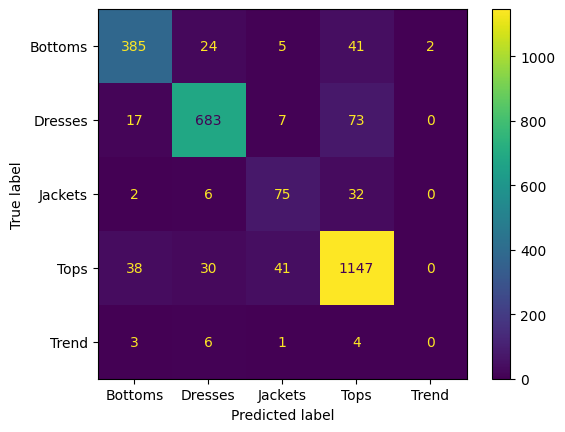

In [ ]:
# @title
cm = confusion_matrix(y_test_dresses_enc, dresses_class_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=le_dresses.classes_).plot()

In [ ]:
# @title
feature_names_dresses = tfidf.get_feature_names_out()

In [ ]:
# @title
features_df = pd.DataFrame()
features_df['term'] = feature_names_dresses

for i in range(len(le_dresses.classes_)):
    name = le_dresses.classes_[i]
    features_df[name] = logreg.coef_[i]

In [ ]:
# @title
features_df

,term,Bottoms,Dresses,Jackets,Tops,Trend
0,00,-0.227776,-0.074802,0.094474,0.219207,-0.235370
1,00p,-0.130434,0.754305,0.051125,-0.721597,-0.266759
2,03,-0.014717,-0.020301,-0.017424,0.036340,-0.001396
3,0dd,-0.050945,-0.069051,-0.016309,0.117918,-0.003712
4,0p,-0.058647,0.676158,-0.417472,-0.415340,-0.361347
...,...,...,...,...,...,...
9002,zipping,-0.129186,0.314376,0.373277,-0.394406,-0.035403
9003,zips,-0.063217,-0.210635,-0.053659,0.091413,1.263707
9004,zombie,-0.020985,-0.041004,0.454614,-0.143694,-0.006733
9005,zone,-0.058749,0.063079,0.078079,-0.117416,-0.004502


In [ ]:
# @title
features_df.sort_values(by='Dresses', ascending=False).reset_index(drop=True)[:25]

,term,Bottoms,Dresses,Jackets,Tops,Trend
0,dress,-9.884820,22.704562,-6.451133,-16.967410,2.492644
1,dresses,-2.137500,5.561173,-0.979728,-3.330162,-1.253637
2,slip,-0.840062,3.086492,-1.311196,-2.134389,-0.399957
3,belt,0.794442,2.523587,-1.185958,-2.162651,-0.726121
4,boots,0.426395,2.404859,0.183263,-2.142307,-0.931539
5,wedding,-0.580822,2.329693,-0.820723,-1.789896,0.725879
6,knee,0.066961,2.239187,-0.472943,-2.383944,0.316477
7,bust,-2.605351,2.223047,-1.697281,0.109274,0.600305
8,flattering,-0.309039,1.742047,-1.462440,-0.843479,-0.387775
9,petite,0.396884,1.694402,1.778991,-1.423552,-0.857532


## Кросс-валидация и подбор параметров

### Задание 3

Проведите кросс-валидацию на материале задания 2.2. Воспользуйтесь функцией cross_validate. Затем используйте GridSearchCV для подбора параметров. Например, подберите лучший C-параметр логистической регрессии из следующих значений: [0.5, 1, 2].

In [ ]:
# @title
from sklearn.model_selection import cross_validate

In [ ]:
# @title
logreg_cv = LogisticRegression(random_state=42, multi_class='ovr', class_weight='balanced')

In [ ]:
# @title
scoring = {
           'f1': 'f1_weighted',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted'
           }

In [ ]:
# @title
# без return_estimator эта функция не вернёт обученную модель!
scores = cross_validate(logreg_cv,
                        X_train_dresses_vec,
                        y_train_dresses_enc,
                        scoring=scoring,
                        cv=5,
                        return_estimator=True,
                        return_train_score=True,
                        )

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# @title
scores_df = pd.DataFrame.from_dict(scores)

In [ ]:
# @title
scores_df

,fit_time,score_time,estimator,test_f1,train_f1,test_precision,train_precision,test_recall,train_recall
0,1.092693,0.014960,"LogisticRegression(class_weight='balanced', mu...",0.877926,0.945278,0.876424,0.946734,0.879924,0.944851
1,0.870424,0.010479,"LogisticRegression(class_weight='balanced', mu...",0.891202,0.941162,0.890817,0.942995,0.893198,0.940569
2,1.069656,0.013120,"LogisticRegression(class_weight='balanced', mu...",0.877851,0.942971,0.875838,0.944638,0.880483,0.942476
3,0.763125,0.011465,"LogisticRegression(class_weight='balanced', mu...",0.872480,0.944688,0.871620,0.946247,0.874126,0.944224
4,0.832483,0.011412,"LogisticRegression(class_weight='balanced', mu...",0.875279,0.943985,0.873518,0.945488,0.877940,0.943588


In [ ]:
# @title
param_grid = {'C': [0.5, 1, 2]}

In [ ]:
# @title
param_grid

{'C': [0.5, 1, 2]}

In [ ]:
# @title
from sklearn.model_selection import GridSearchCV

In [ ]:
# @title
logreg_gs = LogisticRegression(random_state=42, multi_class='ovr', class_weight='balanced')

In [ ]:
# @title
search = GridSearchCV(logreg_gs, param_grid, n_jobs=2, cv=5, scoring='f1_weighted', return_train_score=True, verbose=1)

In [ ]:
# @title
%%time
search.fit(X_train_dresses_vec, y_train_dresses_enc)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: user 1.49 s, sys: 115 ms, total: 1.61 s
Wall time: 20.1 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          multi_class='ovr', random_state=42),
             n_jobs=2, param_grid={'C': [0.5, 1, 2]}, return_train_score=True,
             scoring='f1_weighted', verbose=1)

In [ ]:
# @title
gs_results_df = pd.DataFrame(search.cv_results_)

In [ ]:
# @title
gs_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.128934,0.438096,0.012461,0.010221,0.5,{'C': 0.5},0.874235,0.889943,0.875423,0.869811,...,0.876674,0.006900,3,0.929159,0.926592,0.927127,0.927210,0.927551,0.927528,0.000872
1,1.794163,0.357544,0.008967,0.005323,1,{'C': 1},0.877926,0.891202,0.877851,0.872480,...,0.878948,0.006445,2,0.945278,0.941162,0.942971,0.944688,0.943985,0.943617,0.001448
2,1.659201,0.329342,0.007898,0.003886,2,{'C': 2},0.875384,0.894254,0.881051,0.870187,...,0.879261,0.008247,1,0.960938,0.957965,0.957798,0.959021,0.958895,0.958924,0.001119


In [ ]:
# @title
gs_preds = search.predict(X_test_dresses_vec)

In [ ]:
# @title
print(classification_report(y_test_dresses_enc,
                            gs_preds,
                            target_names=le_dresses.classes_))

              precision    recall  f1-score   support

     Bottoms       0.86      0.84      0.85       457
     Dresses       0.91      0.88      0.90       780
     Jackets       0.62      0.64      0.63       115
        Tops       0.89      0.92      0.90      1256
       Trend       0.00      0.00      0.00        14

    accuracy                           0.88      2622
   macro avg       0.66      0.66      0.66      2622
weighted avg       0.87      0.88      0.88      2622



In [ ]:
# @title
search.best_params_

{'C': 2}

In [ ]:
# @title
